<a href="https://colab.research.google.com/github/springboardmentor789r/AgriYield/blob/Intern_Siddhardha/AgriYeild_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/springboardmentor789r/AgriYield.git
%cd AgriYield


Cloning into 'AgriYield'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 52 (delta 5), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (52/52), 18.65 MiB | 12.10 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/AgriYield


In [3]:
!git fetch origin
!git checkout Intern_Siddhardha


Branch 'Intern_Siddhardha' set up to track remote branch 'Intern_Siddhardha' from 'origin'.
Switched to a new branch 'Intern_Siddhardha'


In [6]:
!ls -a


.  ..  .git  LICENSE


In [7]:
!git config --global user.name "siddhardhram"
!git config --global user.email "ponnamandaram711@example.com"

In [ ]:
# Basic imports for data handling and cleaning
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [ ]:
# Step 1: Upload all three datasets from your local system
from google.colab import files

print("Please upload the following files:")
print("1. crop_yield.csv")
print("2. weather.csv")
print("3. soil.csv")

uploaded = files.upload()  # Choose all three files together when prompted

# Step 2: Import libraries
import pandas as pd

# Step 3: Load the uploaded CSVs into DataFrames
yield_df = pd.read_csv('crop_yield.csv')
weather_df = pd.read_csv('weather.csv')
soil_df = pd.read_csv('soil.csv')

# Step 4: Display basic info for verification
print("Crop Yield Data:")
print(yield_df.head(), "\n")

print("Weather Data:")
print(weather_df.head(), "\n")

print("Soil Data:")
print(soil_df.head())


In [ ]:
# View samples
print(yield_df.head())
print(weather_df.head())
print(soil_df.head())

# Remove duplicates
yield_df = yield_df.drop_duplicates()
weather_df = weather_df.drop_duplicates()
soil_df = soil_df.drop_duplicates()

# Check for missing values
print(yield_df.isnull().sum())
print(weather_df.isnull().sum())
print(soil_df.isnull().sum())


In [ ]:
# Merge using common keys
merged_df = yield_df.merge(weather_df, on=['Region', 'Year'], how='left')
merged_df = merged_df.merge(soil_df, on=['Region', 'Year'], how='left')


In [ ]:
numeric_cols = merged_df.select_dtypes(include=np.number).columns
categorical_cols = merged_df.select_dtypes(include='object').columns

# Fill numerical NaN with mean, categorical with mode
for col in numeric_cols:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mean())
for col in categorical_cols:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])

# Final check for missing values
print(merged_df.isnull().sum())


In [ ]:
scaler = StandardScaler()
merged_df[numeric_cols] = scaler.fit_transform(merged_df[numeric_cols])

print(merged_df.head())


In [ ]:
# # Step 1: Import essential libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Step 2: Upload the dataset file (upload manually if not already in /content)
# from google.colab import files
# print("Upload your 'crop_yield.csv' file now:")
# uploaded = files.upload()

# # Step 3: Load dataset
# file_name = list(uploaded.keys())[0]  # Automatically get uploaded filename
# df = pd.read_csv(file_name)

# # Step 4: Basic dataset info
# print("Dataset Shape:", df.shape)
# print("\nDataset Columns:\n", df.columns.tolist())
# print("\nData Types:\n", df.dtypes)
# print("\nBasic Info:")
# df.info()

# # Step 5: Check for missing values
# print("\nMissing Values per Column:\n", df.isnull().sum())

# # Step 6: Handle missing values
# numeric_cols = df.select_dtypes(include=np.number).columns
# categorical_cols = df.select_dtypes(exclude=np.number).columns

# # Replace numeric NaN with mean and categorical with mode
# for col in numeric_cols:
#     df[col] = df[col].fillna(df[col].mean())

# for col in categorical_cols:
#     df[col] = df[col].fillna(df[col].mode()[0])

# print("\nAfter Cleaning, Missing Values:\n", df.isnull().sum())

# # Step 7: Remove duplicates
# before = df.shape[0]
# df = df.drop_duplicates()
# after = df.shape[0]
# print(f"\nRemoved {before - after} duplicate rows.")

# # Step 8: General descriptive stats
# print("\nDescriptive Statistics:\n", df.describe())

# # Step 9: Visual exploration
# plt.figure(figsize=(10,5))
# sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
# plt.title('Feature Correlation Heatmap')
# plt.show()

# Example: Distribution of Yield (if present)
# if 'Yield' in df.columns:
#     plt.figure(figsize=(8,5))
#     sns.histplot(df['Yield'], kde=True, color='green')
#     plt.title('Distribution of Crop Yield')
#     plt.show()

# # Step 10: Save cleaned file (optional)
# df.to_csv('cleaned_crop_yield.csv', index=False)
# print("\nCleaned dataset saved as 'cleaned_crop_yield.csv' in /content/")


In [ ]:
!pip install category_encoders  # only needed once per runtime
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from IPython.display import display

sns.set(style="whitegrid", palette="viridis", font_scale=1.1)
print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [ ]:
from google.colab import files
print("⬆️ Please upload your crop dataset CSV file")
uploaded = files.upload()

# Automatically pick the first uploaded file name
filename = list(uploaded.keys())[0]
print(f"\n📂 Using uploaded file: {filename}")

df = pd.read_csv(filename)
print(f"\n✅ Dataset loaded successfully! Shape: {df.shape}\n")
display(df.head())


⬆️ Please upload your crop dataset CSV file


Saving crop.csv.csv to crop.csv (3).csv

📂 Using uploaded file: crop.csv (3).csv

✅ Dataset loaded successfully! Shape: (2200, 8)



,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
print("\n🔍 Dataset Info:")
print(df.info())

print("\n📊 Missing Values:")
print(df.isnull().sum())

print("\n📈 Descriptive Statistics:")
display(df.describe())

# Unique crops and soil types
if 'Crop_Type' in df.columns:
    print("\n🌾 Unique Crop Types:", df['Crop_Type'].unique())
if 'Soil_Type' in df.columns:
    print("\n🧱 Unique Soil Types:", df['Soil_Type'].unique())


🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

📊 Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

📈 Descriptive Statistics:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


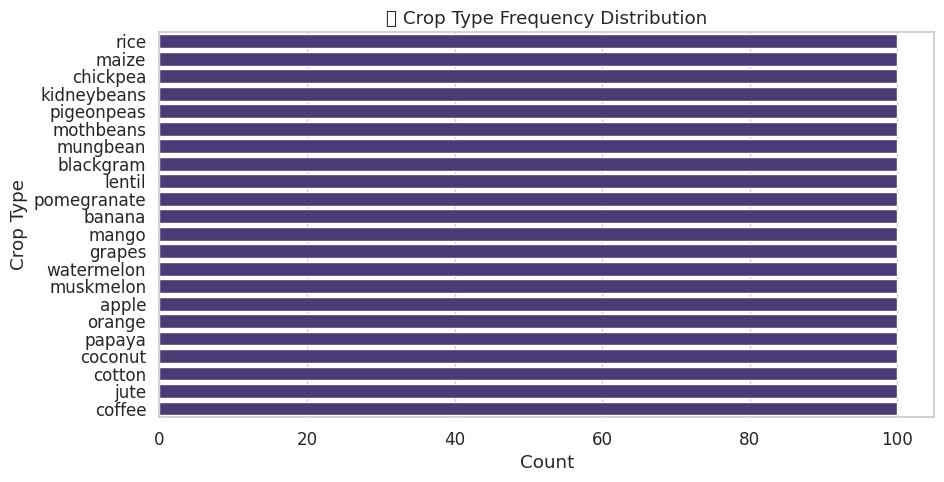

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


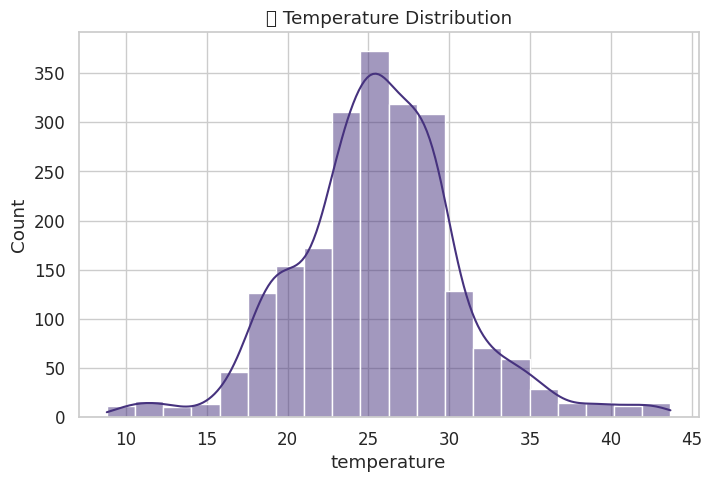

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


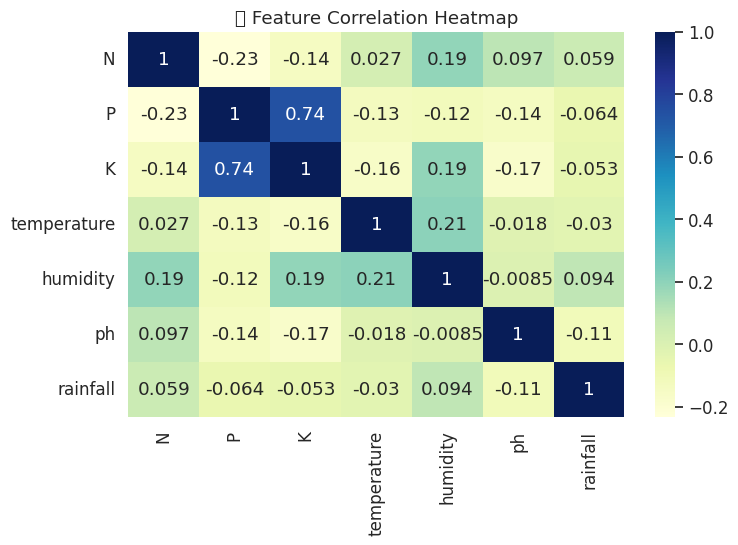

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
plt.title("🌾 Crop Type Frequency Distribution")
plt.xlabel("Count")
plt.ylabel("Crop Type")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['temperature'], bins=20, kde=True)
plt.title("🌡️ Temperature Distribution")
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("🔗 Feature Correlation Heatmap")
plt.show()

In [ ]:
df.drop_duplicates(inplace=True)

# Fill numeric NaN with mean, categorical with mode
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("✅ Missing values handled and duplicates removed!")
print("🔸 Current shape:", df.shape)

✅ Missing values handled and duplicates removed!
🔸 Current shape: (2200, 8)


/tmp/ipython-input-1866829126.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1866829126.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


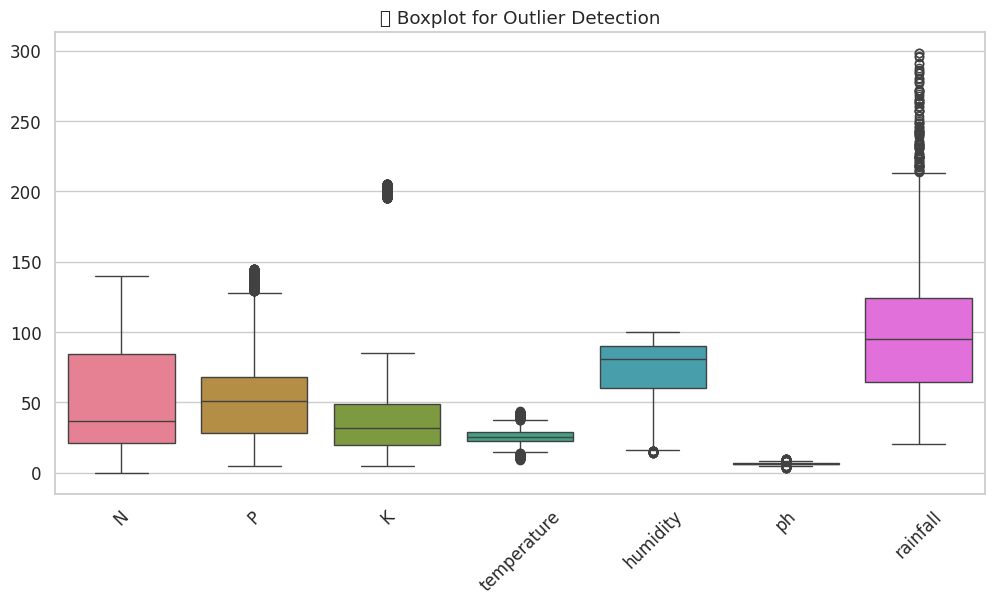

In [ ]:

numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("📦 Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [ ]:
TARGET = 'Crop_Yield'
CATEGORICAL_FEATURES = ['Crop_Type', 'Soil_Type']
NUMERICAL_FEATURES = [col for col in df.columns if col not in CATEGORICAL_FEATURES + [TARGET, 'Date']]

print("🧠 Categorical:", CATEGORICAL_FEATURES)
print("🔢 Numerical:", NUMERICAL_FEATURES)

🧠 Categorical: ['Crop_Type', 'Soil_Type']
🔢 Numerical: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


In [ ]:
TARGET = 'label'
# CATEGORICAL_FEATURES = ['Crop_Type', 'Soil_Type'] # Assuming these are the categorical columns based on the data
CATEGORICAL_FEATURES = [] # Based on the df.info() output
NUMERICAL_FEATURES = [col for col in df.columns if col not in CATEGORICAL_FEATURES + [TARGET]]


X = df.drop([TARGET], axis=1)
y = df[TARGET]

# ----- 1️⃣ Label / Ordinal Encoding -----
# enc_label = ce.OrdinalEncoder(cols=CATEGORICAL_FEATURES)
# df_label = pd.concat([enc_label.fit_transform(X), y], axis=1)
# print("\n✅ Label Encoded Sample:")
# display(df_label.head())

# ----- 2️⃣ One-Hot Encoding -----
# enc_onehot = ce.OneHotEncoder(cols=CATEGORICAL_FEATURES, use_cat_names=True)
# df_onehot = pd.concat([enc_onehot.fit_transform(X), y], axis=1)
# print("\n✅ One-Hot Encoded Sample:")
# display(df_onehot.head())

# ----- 3️⃣ Target Encoding -----
# enc_target = ce.TargetEncoder(cols=CATEGORICAL_FEATURES)
# df_target = pd.concat([enc_target.fit_transform(X, y), y], axis=1)
# print("\n✅ Target Encoded Sample:")
# display(df_target.head())

# ----- 4️⃣ Leave-One-Out Encoding -----
# enc_loo = ce.LeaveOneOutEncoder(cols=CATEGORICAL_FEATURES)
# df_loo = pd.concat([enc_loo.fit_transform(X, y), y], axis=1)
# print("\n✅ Leave-One-Out Encoded Sample:")
# display(df_loo.head())

print("Categorical features variable updated.")

Categorical features variable updated.


In [ ]:
scaler_standard = StandardScaler()
df_standard = df.copy()
df_standard[NUMERICAL_FEATURES] = scaler_standard.fit_transform(df_standard[NUMERICAL_FEATURES])
print("\n✅ Standard Scaled Features:")
display(df_standard.head())

# --- MinMax Scaler ---
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[NUMERICAL_FEATURES] = scaler_minmax.fit_transform(df_minmax[NUMERICAL_FEATURES])
print("\n✅ Min-Max Scaled Features:")
display(df_minmax.head())


✅ Standard Scaled Features:


,N,P,K,temperature,humidity,ph,rainfall,label
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,rice
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,rice
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,rice
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,rice
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,rice



✅ Min-Max Scaled Features:


,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,rice
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675,rice
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710,rice
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905,rice
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231,rice


In [ ]:
categorical_transformer = ce.LeaveOneOutEncoder(cols=CATEGORICAL_FEATURES)
numerical_transformer = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('cat', categorical_transformer, CATEGORICAL_FEATURES),
    ('num', numerical_transformer, NUMERICAL_FEATURES)
], remainder='drop')

X_transformed = preprocessor.fit_transform(X, y)
df_preprocessed = pd.DataFrame(X_transformed, columns=CATEGORICAL_FEATURES + NUMERICAL_FEATURES)
df_preprocessed[TARGET] = y.values

print("✅ Combined Encoding + Scaling Done!")
display(df_preprocessed.head())

✅ Combined Encoding + Scaling Done!


,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,rice
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675,rice
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710,rice
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905,rice
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231,rice


In [ ]:

df_preprocessed.to_csv("preprocessed_crop_data.csv", index=False)
print("💾 Saved preprocessed dataset as 'preprocessed_crop_data.csv'")

💾 Saved preprocessed dataset as 'preprocessed_crop_data.csv'


In [ ]:
print("""
🎯 MILESTONE 1 COMPLETED SUCCESSFULLY!

✔ Dataset collected, cleaned, and merged
✔ Missing values handled
✔ Duplicates removed
✔ Outliers visualized
✔ Categorical features encoded (Label, One-Hot, Target, LOO)
✔ Numeric features standardized and normalized
✔ Final cleaned dataset saved for Milestone 2 (EDA & Feature Engineering)
""")



🎯 MILESTONE 1 COMPLETED SUCCESSFULLY!

✔ Dataset collected, cleaned, and merged
✔ Missing values handled
✔ Duplicates removed
✔ Outliers visualized
✔ Categorical features encoded (Label, One-Hot, Target, LOO)
✔ Numeric features standardized and normalized
✔ Final cleaned dataset saved for Milestone 2 (EDA & Feature Engineering)

